<a href="https://colab.research.google.com/github/556HarishAgarwal/hello-world/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))  
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

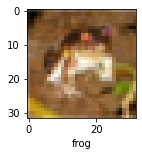

In [9]:
plot_sample(X_train, y_train, 0)

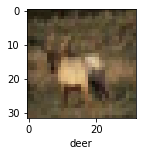

In [10]:
plot_sample(X_train, y_train, 3)

In [11]:
X_train = X_train /255
X_test = X_test / 255

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8331 - accuracy: 0.3476
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6542 - accuracy: 0.4180
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5758 - accuracy: 0.4465
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5205 - accuracy: 0.4686
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4783 - accuracy: 0.4837


In [14]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5115 - accuracy: 0.4720


[1.5114630460739136, 0.47200000286102295]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.41      0.50      1000
           1       0.53      0.65      0.58      1000
           2       0.44      0.20      0.27      1000
           3       0.33      0.34      0.34      1000
           4       0.41      0.44      0.43      1000
           5       0.44      0.33      0.38      1000
           6       0.43      0.68      0.53      1000
           7       0.72      0.34      0.47      1000
           8       0.50      0.71      0.59      1000
           9       0.45      0.61      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [18]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4728 - accuracy: 0.4694
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1205 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9931 - accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9035 - accuracy: 0.6874
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8371 - accuracy: 0.7108
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7792 - accuracy: 0.7287
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7351 - accuracy: 0.7450
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6934 - accuracy: 0.7592
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6547 - accuracy: 0.7702
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.61

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9295 - accuracy: 0.6938


[0.9294784069061279, 0.6937999725341797]

In [24]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

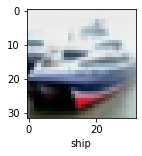

In [25]:
plot_sample(X_test, y_test, 1)

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.7902392e-03, 1.2843590e-04, 3.2908658e-03, 7.1667135e-01,
        6.7584129e-04, 1.7993425e-01, 5.8371343e-02, 5.3107189e-05,
        3.9079133e-02, 5.4561865e-06],
       [3.2619820e-03, 8.4101075e-01, 7.7845107e-07, 1.4709192e-07,
        8.5628265e-08, 3.1017059e-08, 6.3720699e-07, 2.2743902e-09,
        1.3890602e-01, 1.6819632e-02],
       [3.6677012e-01, 5.5120945e-02, 1.5601706e-02, 1.0518399e-02,
        2.8252264e-03, 1.8380022e-03, 8.9024747e-04, 9.6145394e-04,
        4.5840311e-01, 8.7070771e-02],
       [9.1534084e-01, 3.0155601e-03, 7.4402399e-02, 7.9149881e-04,
        7.5593364e-04, 1.0294254e-05, 8.7171665e-04, 1.5032866e-06,
        4.4671982e-03, 3.4306574e-04],
       [1.7520910e-05, 6.8790594e-04, 9.1917077e-03, 9.0623610e-02,
        3.0250245e-01, 5.6753918e-03, 5.9067869e-01, 5.1478819e-06,
        6.1449304e-04, 3.0234739e-06]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

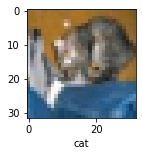

In [35]:
plot_sample(X_test, y_test, 0)

In [34]:
classes[y_classes[0]]

'cat'

In [36]:
print("classification Report: \n", classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70      1000
           1       0.74      0.87      0.80      1000
           2       0.61      0.61      0.61      1000
           3       0.49      0.55      0.52      1000
           4       0.70      0.62      0.66      1000
           5       0.63      0.56      0.59      1000
           6       0.79      0.75      0.77      1000
           7       0.80      0.72      0.75      1000
           8       0.82      0.75      0.79      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

